In [79]:
import sklearn as sk
sk.__version__


'0.24.1'

In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Read Iris dataset from sklearn

In [81]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [84]:
iris = pd.DataFrame(dataset.data)
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [88]:
#Creating datafram with the dataset
iris.columns = dataset.feature_names
iris['Target'] = dataset.target


#### Splitting data into X-independent and y-dependent variables

In [12]:
X = iris.drop('Target',axis=1)
y = iris[['Target']]

### Splitting data into train and test data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Building model using decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

Here we haven't set any hyperparameters like max_depth, min_leaf such a way that decision tree is created in depth. This will
lead to overfitting

### Plot the decision tree from scikit-Learn 

[Text(453.375, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(383.625, 427.11428571428576, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(523.125, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(348.75, 349.4571428571429, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(279.0, 271.8, 'X[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(139.5, 194.14285714285717, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(69.75, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(209.25, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 194.14285714285717, 'X[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(348.75, 116.48571428571432, 'X[2] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(279.0, 38.82857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Tex

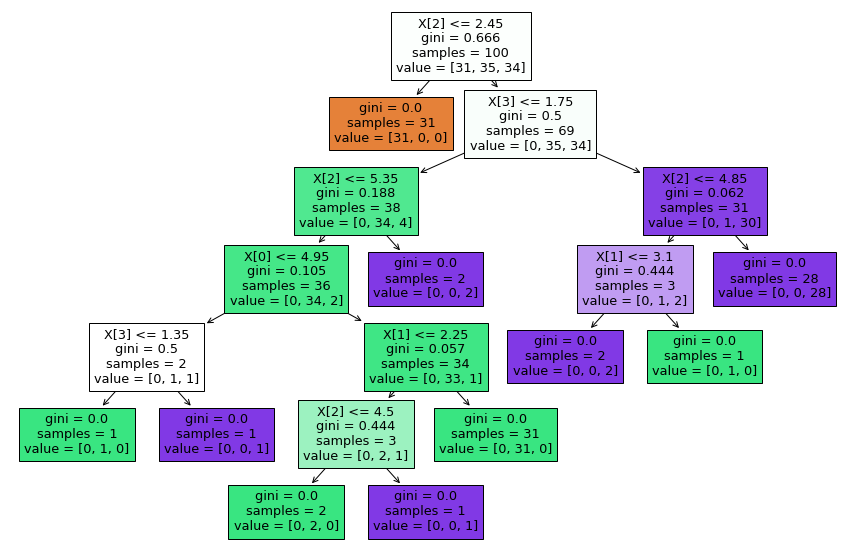

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

##### From the above, we can see the representation of decision tree, the pure leaf is with Gini = 0 and others are impure leaf/split

## Predictive Analysis

In [52]:
y_pred = classifier.predict(X_test)
y_pred


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [47]:
#Comparing actual and predicted outcome
comparison = pd.DataFrame(y_pred)
comparison['Actual'] = y_test.values
comparison['Predicted'] = y_pred
comparison = comparison.drop(0,axis=1,inplace=False)
comparison

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [58]:
## Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {}'. format(accuracy))

Accuracy: 0.98


### Performing Cost Complexity Pruning to avoid Overfitting

In [59]:
path = classifier.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 

##### Two parameters need to set in Cost complexity pruning
##### ccp_alphas -
 - Parameter is set in decison tree to decide at what depth tree is used, find out the weakpoint with respect to leaf node and    all the values stored in the form of list.
 - Assigning each values in the ccp_alphas and do the fit which is append to another list. So based on number of alpha values,    we having/creating that many number of decision tree classifiers.


In [60]:
ccp_alphas

array([0.        , 0.00944444, 0.00967742, 0.03380117, 0.25399375,
       0.32087246])

In [67]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("No of nodes in last tree is: {} with cc_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

No of nodes in last tree is: 1 with cc_alpha: 0.32087246376811596


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

## Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 98% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

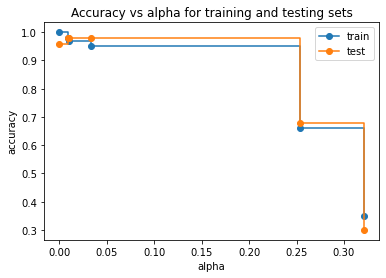

In [71]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

 Here the scenario were classifier giving low bias and low variance at ccp_alpha = around 0.02

In [75]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [76]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.98

[Text(334.8, 475.65000000000003, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(167.4, 339.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(502.20000000000005, 339.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(334.8, 203.85000000000002, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(167.4, 67.94999999999999, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(502.20000000000005, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(669.6, 203.85000000000002, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

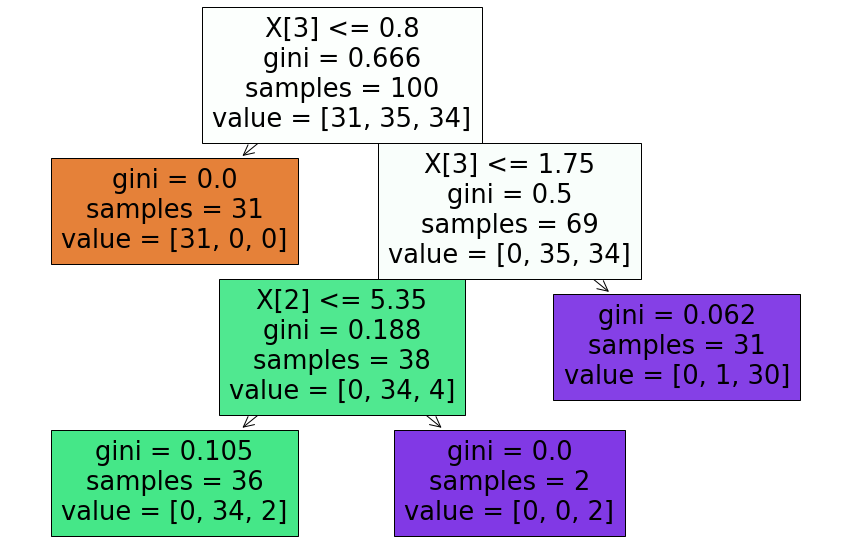

In [74]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

We are able to see the decision tree in very quicker manner after post pruning with less depth = 3, max_leaf = 2 